
#Modelo 1: Pronóstico con ARIMA
[Serie de tiempo ARIMA](https://relopezbriega.github.io/blog/2016/09/26/series-de-tiempo-con-python/)


In [2]:
!pip install holidays
!pip install holidays-co
!pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import holidays_co as hd
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv('/content/medellin.csv',sep=';')
df=df.dropna()
df

,Fecha,Servicios AMD
0,1/01/2019,1220.0
1,2/01/2019,1477.0
2,3/01/2019,1382.0
3,4/01/2019,1329.0
4,5/01/2019,1135.0
...,...,...
844,24/04/2021,1241.0
845,25/04/2021,1253.0
846,26/04/2021,1294.0
847,27/04/2021,1189.0


In [ ]:
df["Festivo"]=0
df["dayyear"]=0
df["year"]=0
df["weekday"]=0
df["fecha"]=0

for i in range(0,len(df)):
  df["dayyear"][i]=datetime.strptime(str(df["Fecha"][i]), "%d/%m/%Y").strftime("%j")
  df["year"][i]=datetime.strptime(str(df["Fecha"][i]), "%d/%m/%Y").strftime("%y")
  df["weekday"][i]=datetime.strptime(str(df["Fecha"][i]), "%d/%m/%Y").strftime("%w")
  df["fecha"][i]=datetime.strptime(str(df["Fecha"][i]), "%d/%m/%Y")
  if hd.is_holiday_date(datetime.strptime(str(df["Fecha"][i]), "%d/%m/%Y"))==True:
    df["Festivo"][i]=1
  else:
    df["Festivo"][i]=0
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dis

,Fecha,Servicios AMD,Festivo,dayyear,year,weekday,fecha
0,1/01/2019,1220.0,1,1,19,2,2019-01-01 00:00:00
1,2/01/2019,1477.0,0,2,19,3,2019-01-02 00:00:00
2,3/01/2019,1382.0,0,3,19,4,2019-01-03 00:00:00
3,4/01/2019,1329.0,0,4,19,5,2019-01-04 00:00:00
4,5/01/2019,1135.0,0,5,19,6,2019-01-05 00:00:00
...,...,...,...,...,...,...,...
844,24/04/2021,1241.0,0,114,21,6,2021-04-24 00:00:00
845,25/04/2021,1253.0,0,115,21,0,2021-04-25 00:00:00
846,26/04/2021,1294.0,0,116,21,1,2021-04-26 00:00:00
847,27/04/2021,1189.0,0,117,21,2,2021-04-27 00:00:00


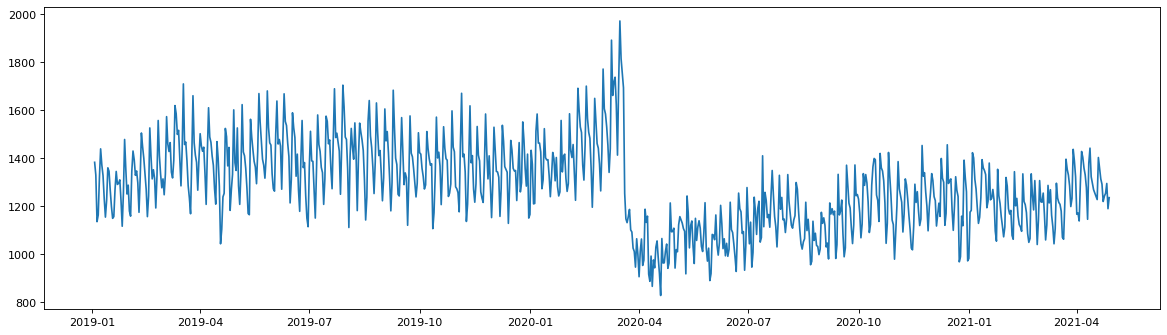

In [ ]:
plt.figure(figsize=(18, 5), dpi=80)
plt.plot(df["fecha"],df["Servicios AMD"])

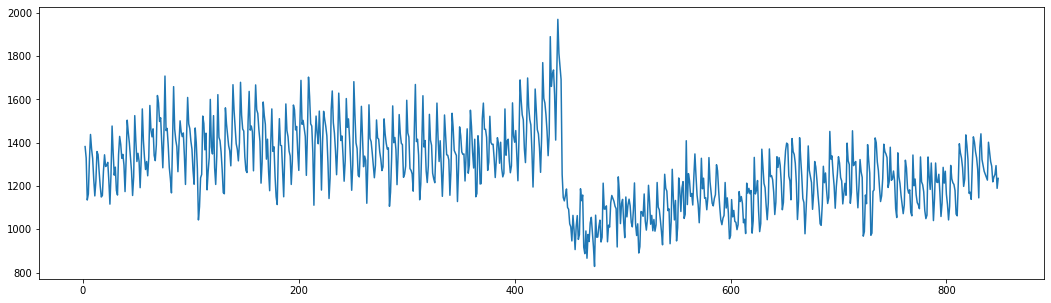

In [ ]:
plot = df["Servicios AMD"].plot(figsize=(18, 5))

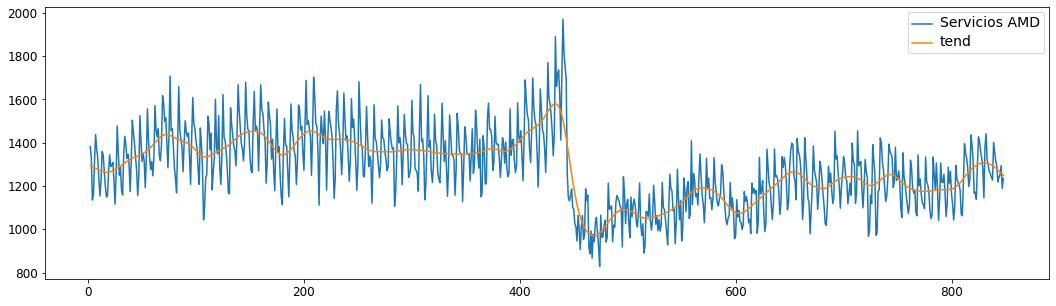

In [ ]:
ciclo, tend = sm.tsa.filters.hpfilter(df["Servicios AMD"])
df['tend'] = tend
df[["Servicios AMD","tend"]].plot(figsize=(18, 5),fontsize=12)
legend = plt.legend()
legend.prop.set_size(14);

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


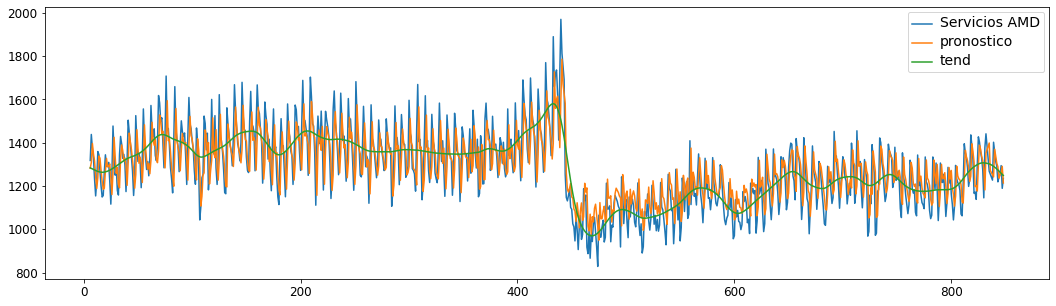

In [ ]:
modelo = sm.tsa.ARIMA(df["Servicios AMD"].iloc[0:], order=(1, 0, 0))  
resultados = modelo.fit(disp=-1)  
df['pronostico'] = resultados.fittedvalues  
df=df.dropna()
plot = df[['Servicios AMD', 'pronostico','tend']].plot(figsize=(18, 5),fontsize=12)
legend = plt.legend()
legend.prop.set_size(14);

In [ ]:
df_train=df.head(len(df)-15)
df_test=df.tail(15)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


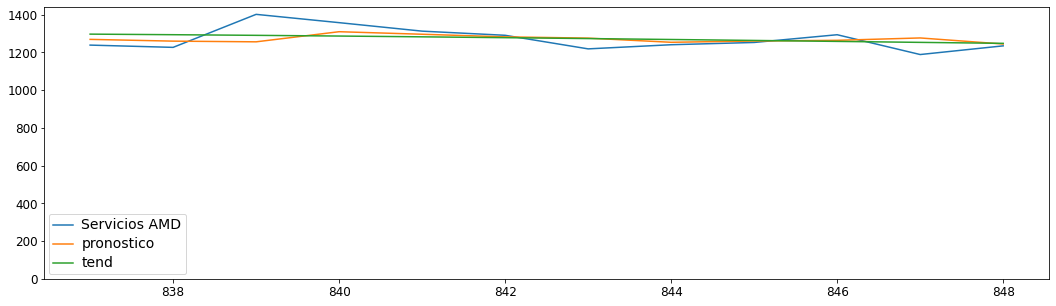

In [ ]:
modelo = sm.tsa.ARIMA(df_test["Servicios AMD"].iloc[1:], order=(1, 0, 0))  
resultados = modelo.fit(disp=-1)  
df_test['pronostico'] = resultados.fittedvalues  
df_test=df_test.dropna()
plot = df_test[['Servicios AMD', 'pronostico','tend']].plot(figsize=(18, 5),fontsize=12) 
plt.ylim(0,max(df_test["pronostico"])*1.1)
legend = plt.legend()
legend.prop.set_size(14);

In [ ]:
df_test["|diferecia|"]=abs(df_test["Diferencia"])
df_test.sort_values(by="|diferecia|", ascending=True)

,Fecha,Servicios AMD,Festivo,dayyear,year,weekday,fecha,tend,pronostico,Diferencia,|diferecia|
845,25/04/2021,1253.0,0,115,21,0,2021-04-25 00:00:00,1263.739306,1260.673198,-7.673198,7.673198
842,22/04/2021,1291.0,0,112,21,4,2021-04-22 00:00:00,1278.388688,1282.738447,8.261553,8.261553
848,28/04/2021,1235.0,0,118,21,3,2021-04-28 00:00:00,1248.316592,1244.737185,-9.737185,9.737185
844,24/04/2021,1241.0,0,114,21,6,2021-04-24 00:00:00,1268.756000,1253.931039,-12.931039,12.931039
841,21/04/2021,1313.0,0,111,21,3,2021-04-21 00:00:00,1282.869355,1296.529227,16.470773,16.470773
846,26/04/2021,1294.0,0,116,21,1,2021-04-26 00:00:00,1258.639140,1264.350740,29.649260,29.649260
837,17/04/2021,1239.0,0,107,21,6,2021-04-17 00:00:00,1297.169746,1269.366423,-30.366423,30.366423
838,18/04/2021,1227.0,0,108,21,0,2021-04-18 00:00:00,1294.150236,1260.060275,-33.060275,33.060275
840,20/04/2021,1358.0,0,110,21,2,2021-04-20 00:00:00,1287.021128,1310.013546,47.986454,47.986454
843,23/04/2021,1219.0,0,113,21,5,2021-04-23 00:00:00,1273.655989,1275.996288,-56.996288,56.996288


In [ ]:
df_test["Diferencia"]=df_test["Servicios AMD"]-df_test["pronostico"]
df_test["Diferencia"].mean()


0.7754355648874783

In [ ]:
error_mse = mean_squared_error(
                y_true = df_test["Servicios AMD"],
                y_pred = df_test["pronostico"]
            )
print(f"Error de test (mse): {error_mse}")

Error de test (mse): 3169.9543895391375


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


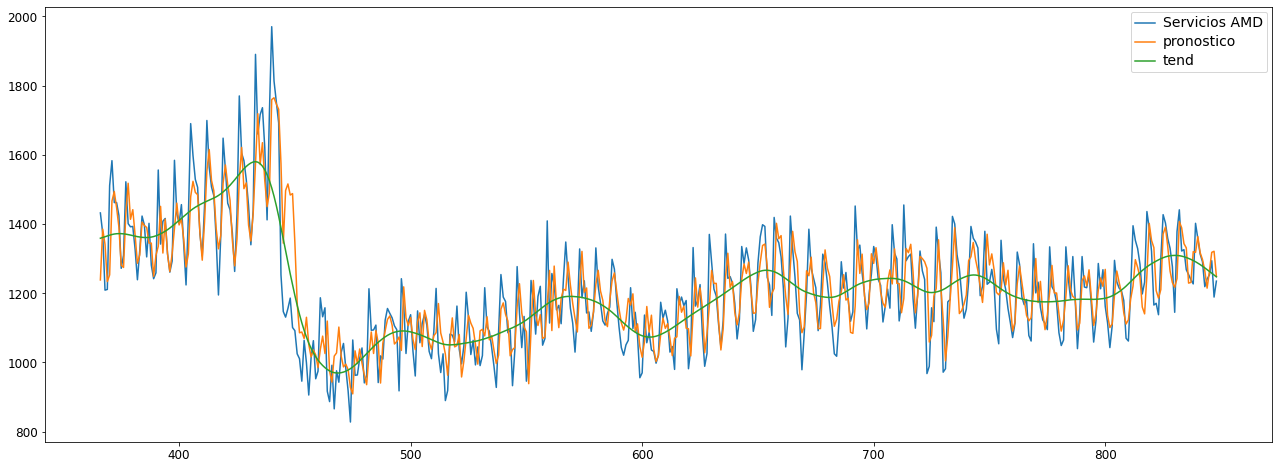

In [ ]:
df1=df[df["year"]>=20]
modelo = sm.tsa.ARIMA(df1["Servicios AMD"].iloc[1:], order=(7, 0, 0))  
resultados = modelo.fit(disp=-1)  
df1['pronostico'] = resultados.fittedvalues  
df1=df1.dropna()
plot = df1[['Servicios AMD', 'pronostico','tend']].plot(figsize=(22, 8),fontsize=12) 
legend = plt.legend()
legend.prop.set_size(14);


In [ ]:
df1["Diferencia"]=df1["Servicios AMD"]-df1["pronostico"]
df1["Diferencia"]

366    193.556803
367    -11.364775
368   -132.482823
369    -22.692517
370    257.946840
          ...    
844     26.223934
845    -11.011201
846    -24.182584
847   -132.248123
848    -14.029830
Name: Diferencia, Length: 483, dtype: float64

In [ ]:
df1.sort_values(by='pronostico', ascending=False)

,Fecha,Servicios AMD,Festivo,dayyear,year,weekday,fecha,tend,pronostico,Diferencia
441,17/03/2020,1813.0,0,77,20,2,2020-03-17 00:00:00,1480.177248,1764.675538,48.324462
440,16/03/2020,1970.0,0,76,20,1,2020-03-16 00:00:00,1504.483113,1759.554642,210.445358
442,18/03/2020,1752.0,0,78,20,3,2020-03-18 00:00:00,1452.649380,1746.467463,5.532537
443,19/03/2020,1692.0,0,79,20,4,2020-03-19 00:00:00,1422.394149,1731.382453,-39.382453
434,10/03/2020,1660.0,0,70,20,2,2020-03-10 00:00:00,1578.660838,1718.623277,-58.623277
...,...,...,...,...,...,...,...,...,...,...
487,2/05/2020,1019.0,0,123,20,6,2020-05-02 00:00:00,1063.978084,940.646610,78.353390
551,5/07/2020,1007.0,0,187,20,0,2020-07-05 00:00:00,1127.811082,938.784334,68.215666
481,26/04/2020,963.0,0,117,20,0,2020-04-26 00:00:00,1025.789518,935.922525,27.077475
474,19/04/2020,828.0,0,110,20,0,2020-04-19 00:00:00,982.246040,927.689928,-99.689928


In [ ]:
error_mse = mean_squared_error(
                y_true = df1["Servicios AMD"],
                y_pred = df1["pronostico"]
            )
print(f"Error de test (mse): {error_mse}")

Error de test (mse): 8255.58164072291


#Modelo 2: Pronostico de la serie sin transformar

[Ver notas de clase](https://jdvelasq.github.io/courses/notebooks/sklearn/mlp/1-04-pronostico-series-de-tiempo.html)


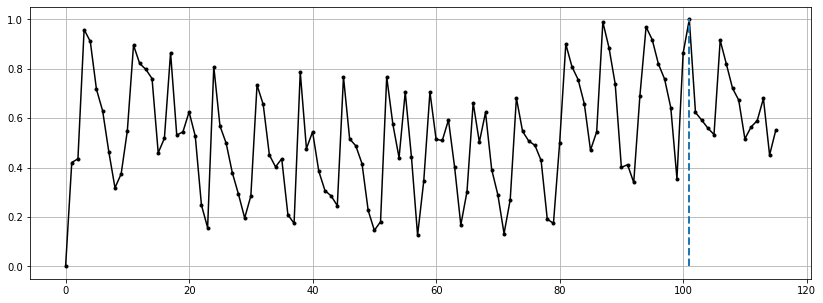

In [ ]:
data21=df[df["year"]==21]
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# crea el transformador
scaler = MinMaxScaler()

# escala la serie
data_scaled = scaler.fit_transform(np.array(data21["Servicios AMD"]).reshape(-1, 1))

# z es un array de listas como efecto
# del escalamiento
data_scaled = [u[0] for u in data_scaled]

plt.figure(figsize=(14, 5))
plt.plot(data_scaled, ".-k")
plt.grid()
plt.plot(
    [len(data_scaled) - 15, len(data_scaled) - 15],
    [min(data_scaled), max(data_scaled)],
    "--",
    linewidth=2,
);

In [ ]:
P =  15

X = []
for t in range(P - 1, len(data21) - 1):
    X.append([data_scaled[t - n] for n in range(P)])

observed_scaled = data_scaled[P:]

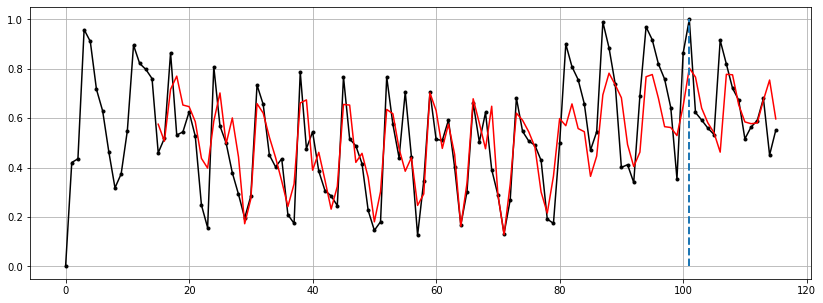

In [ ]:

from sklearn.neural_network import MLPRegressor

np.random.seed(123456)

H = 1  # Se escoge arbitrariamente

mlp = MLPRegressor(
    hidden_layer_sizes=(H,),
    activation="logistic",
    learning_rate="adaptive",
    momentum=0.0,
    learning_rate_init=0.09,
    max_iter=60000,
)

# Entrenamiento
mlp.fit(X[0:(len(data21)-15)], observed_scaled[0:(len(data21)-15)])  # 239 - 24 = 215

# Pronostico
y_scaled_m1 = mlp.predict(X)

plt.figure(figsize=(14, 5))
plt.plot(data_scaled, ".-k")
plt.grid()

# No hay pronóstico para los primeros 13 valores
# de la serie
#
plt.plot([None] * P + y_scaled_m1.tolist(), "-r")

# linea vertical para dividir el entrenamiento
# del pronóstico. Se ubica en el ultimo dato
# usando para entrenamiento
#
plt.plot(
    [len(data_scaled) - 15, len(data_scaled) - 15],
    [min(data_scaled), max(data_scaled)],
    "--",
    linewidth=2,
);

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/axis.py", line 1573, in convert_units
    ret = self.converter.convert(x, self.units, self)
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/category.py", line 61, in convert
    unit.update(values)
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/category.py", line 212, in update
    cbook._check_isinstance((str, bytes), value=val)
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py", line 2128, in _check_isinstance
    type_name(type(v))))
TypeError: 'value' must be an instance of str or bytes, not a NoneType

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/lines.py", line 665, in recache_always
    self.recache(alw

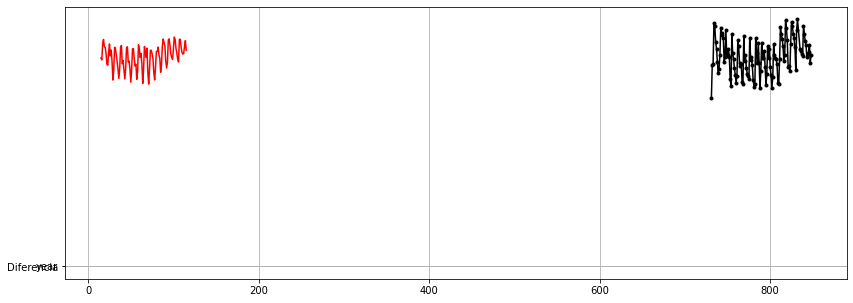

In [ ]:
y_m1 = scaler.inverse_transform([[u] for u in y_scaled_m1])
y_m1 = [u[0] for u in y_m1]

plt.figure(figsize=(14, 5))
plt.plot(data21["Servicios AMD"], ".-k")
plt.grid()
plt.plot([None] * P + y_m1, "-r")
plt.plot([len(data21) - 24, len(data21) - 24], [min(data21), max(data21)], "--", linewidth=2);

#Modelo 3: Pronóstico de la serie transformada

[Ver notas de clase](https://jdvelasq.github.io/courses/notebooks/sklearn/mlp/1-04-pronostico-series-de-tiempo.html)


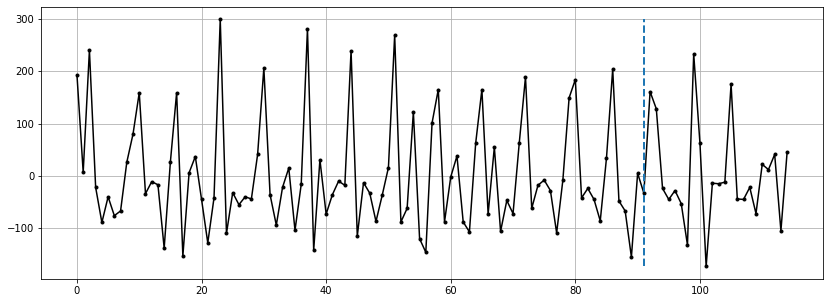

In [ ]:
# Se remueve la tendencia
data=data21["Servicios AMD"].to_list()
data_d1 = [data[t] - data[t - 1] for t in range(1, len(data))]

# En la gráfica queda la componente cíclica
plt.figure(figsize=(14, 5))
plt.plot(data_d1, ".-k")
plt.grid()
plt.plot(
    [len(data_d1) - 24, len(data_d1) - 24],
    [min(data_d1), max(data_d1)],
    "--",
    linewidth=2,
);

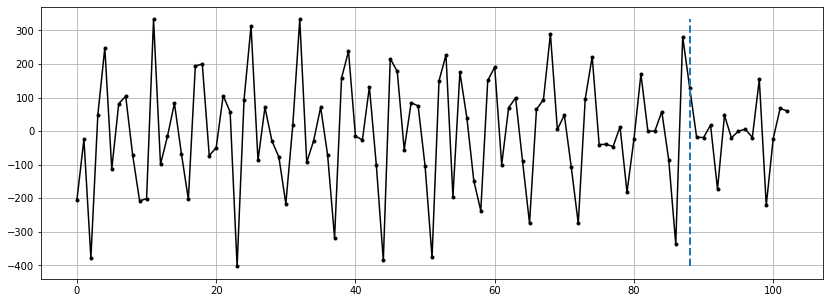

In [ ]:
data_d1d12 = [data_d1[t] - data_d1[t - 12] for t in range(12, len(data_d1))]

plt.figure(figsize=(14, 5))
plt.plot(data_d1d12, ".-k")
plt.grid()
plt.plot(
    [len(data_d1d12) - 15, len(data_d1d12) - 15],
    [min(data_d1d12), max(data_d1d12)],
    "--",
    linewidth=2,
);

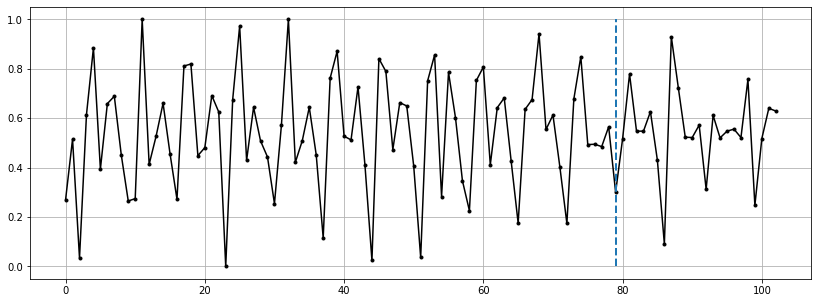

In [ ]:
#
# Se escalan los valores como en el caso anaterior
#
scaler = MinMaxScaler()
data_d1d12_scaled = scaler.fit_transform(np.array(data_d1d12).reshape(-1, 1))
data_d1d12_scaled = [u[0] for u in data_d1d12_scaled]

#
# Se verifica visualmente el escalamiento
#
plt.figure(figsize=(14, 5))
plt.plot(data_d1d12_scaled, ".-k")
plt.grid()
plt.plot(
    [len(data_d1d12_scaled) - 24, len(data_d1d12_scaled) - 24],
    [min(data_d1d12_scaled), max(data_d1d12_scaled)],
    "--",
    linewidth=2,
);

In [ ]:
P = 13

X = []
for t in range(P - 1, len(data_d1d12_scaled) - 1):
    X.append([data_d1d12_scaled[t - n] for n in range(P)])

d = data_d1d12_scaled[P:]
len(X)

90

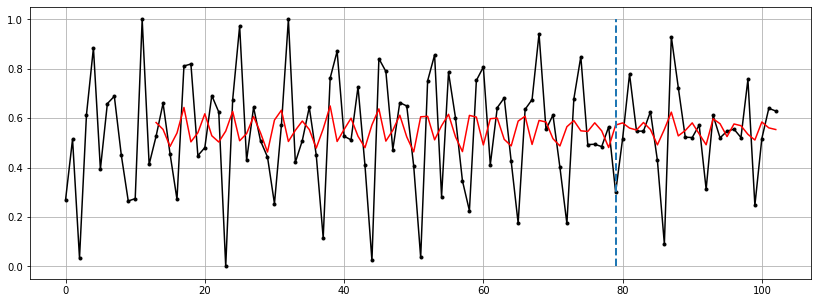

In [ ]:
H = 4 # Se escoge arbitrariamente

np.random.seed(123456)

mlp = MLPRegressor(
    hidden_layer_sizes=(H, ),
    activation = 'logistic',
    learning_rate = 'adaptive',
    momentum = 0.0,
    learning_rate_init = 0.002,
    max_iter = 100000)

# Entrenamiento
mlp.fit(
    X[0:len(X)-15],  # 226 - 24 = 202
    data_d1d12_scaled[0:len(X)-15]
)

# Pronostico
y_d1d12_scaled_m2 = mlp.predict(X)


plt.figure(figsize=(14,5))
plt.plot(data_d1d12_scaled, '.-k')
plt.grid()

# No hay pronóstico para los primeros 13 valores
# de la serie
plt.plot([None] * P + y_d1d12_scaled_m2.tolist(), '-r');

# linea vertical para dividir el entrenamiento
# del pronóstico
plt.plot([len(data_d1d12_scaled)-24, len(data_d1d12_scaled)-24], [min(data_d1d12_scaled), max(data_d1d12_scaled)], '--', linewidth=2);

In [ ]:
y_d1d12_scaled_m2 = data_d1d12_scaled[0:P] + y_d1d12_scaled_m2.tolist()

y_d1d12_m2 = scaler.inverse_transform([[u] for u in y_d1d12_scaled_m2])
y_d1d12_m2 = [u[0] for u in y_d1d12_m2.tolist()]

y_d1_m2 = [y_d1d12_m2[t] + data_d1[t] for t in range(len(y_d1d12_m2))]
y_d1_m2 = data_d1[0:12] + y_d1_m2

y_m2 = [y_d1_m2[t] + data[t] for t in range(len(y_d1_m2))]

y_m2 = [data[0]] + y_m2

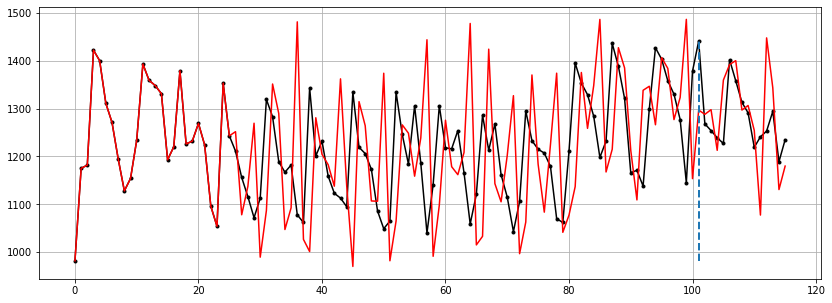

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(data, ".-k")
plt.grid()

plt.plot(y_m2, "-r")

# linea vertical para dividir el entrenamiento
# del pronóstico. Se ubica en el ultimo dato
# usando para entrenamiento
plt.plot([len(data) - 15, len(data) - 15], [min(data), max(data)], "--", linewidth=2);

#Modelo 4: Pronóstico con ADALINE
[Ver notas de clase](https://jdvelasq.github.io/courses/notebooks/sklearn/adaline/1-02-pronostico-airline.html)

In [ ]:
import warnings

warnings.filterwarnings("ignore")

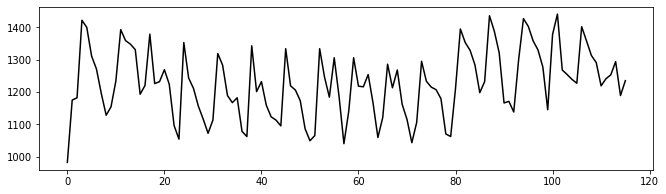

In [ ]:
plt.figure(figsize=(11,3))
plt.plot(data, '-k');

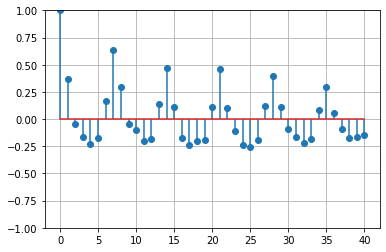

In [ ]:
from statsmodels.tsa.stattools import acf

acf_data = acf(data[0:80], fft=False)
plt.stem(range(len(acf_data)), acf_data, use_line_collection=True)
plt.ylim(-1, 1);
plt.grid();

In [ ]:
import numpy as np

u = np.array(data[1:len(data)]) - np.array(data[0:len(data) - 1])

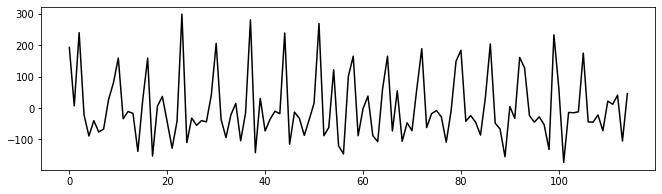

In [ ]:
plt.figure(figsize=(11,3))
plt.plot(u, '-k');

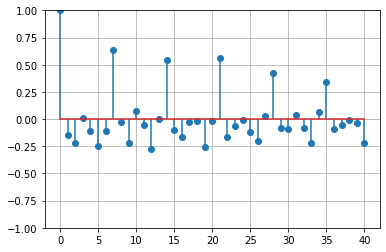

In [ ]:
acf_data = acf(u[0:79], fft=False)
plt.stem(range(len(acf_data)), acf_data, use_line_collection=True)
plt.ylim(-1, 1)
plt.grid();

In [ ]:
import numpy as np

u = np.array(data[1:len(data)]) - np.array(data[0:len(data) - 1])

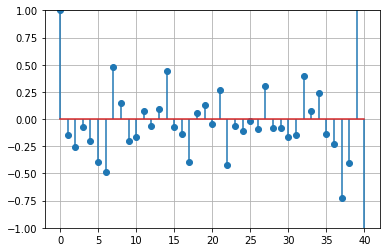

In [ ]:
from statsmodels.tsa.stattools import pacf

pacf_data = pacf(u[0:79])
plt.stem(range(len(pacf_data)), pacf_data, use_line_collection=True)
plt.ylim(-1, 1);
plt.grid();

In [ ]:
class AdalineTS:

    def __init__(self,
                 P=None,               # número de retardos a usar
                 learning_rate=0.001): # tasa de aprendizaje

        self.P = P
        self.learning_rate = learning_rate
        self.X = []
        self.coef_ = [0.] * P
        self.intercept_ = 0.

    def predict(self):
        if len(self.X) < self.P:
            return None
        X = np.array(self.X)
        u = np.dot(X, self.coef_) + self.intercept_
        return u

    def fit(self, d):
        y = self.predict()
        if y is not None:
            e = d - y
            self.coef_ += 2 * self.learning_rate * e * np.array(self.X)
            self.intercept_ += 2 * self.learning_rate * e
        self.X.append(d)
        if len(self.X) > self.P:
            self.X.pop(0)

In [ ]:
optimal_learning_rate = None
optimal_sse = None

P = 3

for learning_rate in np.linspace(start=0.000001, stop=0.01, num=100):

    adaline = AdalineTS(
        P=P,
        learning_rate=learning_rate)

    forecasts = []

    for z in u[0:79]:
        forecasts.append(adaline.predict())
        adaline.fit(z)

    sse = sum([(a-b)**2 for a,b in zip(u[P:79], forecasts[P:])])

    if optimal_sse is None or sse < optimal_sse:
        optimal_sse = sse
        optimal_learning_rate = learning_rate
        print('sse = {}  mu = {}'.format(sse, learning_rate))

sse = 775459.4857588095  mu = 1e-06


In [ ]:
adaline = AdalineTS(
    P=P,
    learning_rate=optimal_learning_rate)

forecasts = []

for z in u:
    forecasts.append(adaline.predict())
    adaline.fit(z)

In [ ]:
s = [m + n for m,n in zip(d[P:len(d)-1], forecasts[P:])]
s = d[0:P+1] + s
len(s)

90

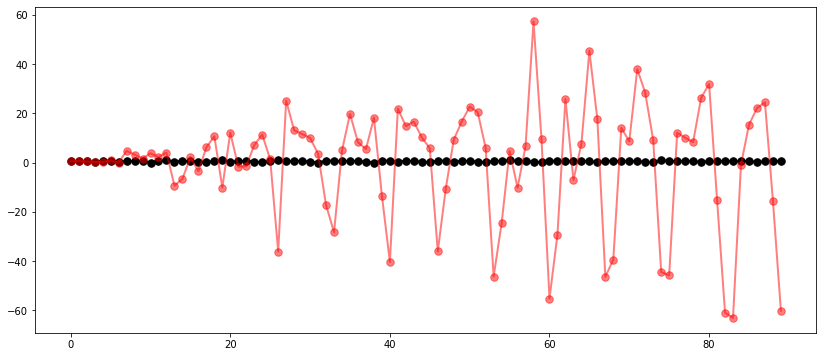

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(d,'.-k', lw=2, ms=15)
plt.plot(s, '.-r', lw=2, ms=15, alpha=0.5)
#plt.vlines([80], ls='--', color='gray')
plt.show()

In [ ]:
mse_fit = sum([(a - b)**2 for a,b in zip(d[4:80], s[4:80])]) / len(s[4:80])
mse_fore = sum([(a - b)**2 for a,b in zip(d[80:], s[80:])]) / len(s[80:])
print(mse_fit, mse_fore)

470.4122909859055 1427.4416747442824
